In [ ]:
! pip install deap

     |████████████████████████████████| 160 kB 15.6 MB/s 


In [ ]:
list_of_nurses = ['A','B','C','D','E','F','G','H']

# nurses' respective shift preferences - morning,evening,night
# assuming it's daily preference
shiftPreferences = [
    [1,0,0],
    [1,1,0],
    [0,0,1],
    [0,1,0],
    [0,1,0],
    [0,1,1],
    [1,1,1],
    [0,1,0]
]
# min and max number of nurses allowed for each shift - morning, evening, night
shiftMin = [2,2,1]
shiftMax = [3,4,2]

# max shifts per week allowed for each nurse
maxShiftsPerWeek = 5

# number of weeks we create a schedule for:
weeks = 1

# useful values
shiftsPerDay = len(shiftMin)
shiftsPerWeek = 7 * shiftsPerDay

In [ ]:
def getNurseShift(schedule):
    """
    Converts the entire schedule into a dictionary with a separate schedule for each nurse
    :param schedule: a list of binary values describing the given schedule
    :return: a dictionary with each nurse as a key and the corresponding shifts as the value
    """
    shiftsPerNurse = len(schedule)//len(list_of_nurses)  # for our case here, we have 21 shifts per nurse
    nurseShiftsDict = {}
    shiftIndex = 0
    for nurse in list_of_nurses:
        nurseShiftsDict[nurse] = schedule[shiftIndex: (shiftIndex + shiftsPerNurse)]
        shiftIndex += shiftsPerNurse
    return nurseShiftsDict

In [ ]:
def countConsecutiveShiftViolations(nurseShiftsDict):
    """
    Counts the consecutive shift violations in the schedule
    :param nurseShiftsDict: a dictionary with a separate schedule for each nurse
    :return: count of violations found
    """
    violations = 0
    # iterate over the shifts of each nurse:
    for nurseShifts in nurseShiftsDict.values():
        # look for two cosecutive '1's:
        for shift1, shift2 in zip(nurseShifts, nurseShifts[1:]):
            if shift1 == 1 and shift2 == 1:
                violations += 1
    return violations

In [ ]:
a = [1,2,3,4]

for s1, s2 in zip(a, a[1:]):
    print(s1, s2)

1 2
2 3
3 4


In [ ]:
def countShiftsPerWeekViolations(nurseShiftsDict):
    """
    Counts the max-shifts-per-week violations in the schedule
    :param nurseShiftsDict: a dictionary with a separate schedule for each nurse
    :return: count of violations found
    """
    violations = 0
    weeklyShiftsList = []
    # iterate over the shifts of each nurse:
    for nurseShifts in nurseShiftsDict.values():  # all shifts of a single nurse
        # iterate over the shifts of each weeks:
        for i in range(0, weeks*shiftsPerWeek, shiftsPerWeek):
            # shiftsPerWeek is 21 (3 shifts per day*7)
            # count all the '1's over the week:
            weeklyShifts = sum(nurseShifts[i:i + shiftsPerWeek])
            weeklyShiftsList.append(weeklyShifts)
            if weeklyShifts > maxShiftsPerWeek:
                violations += weeklyShifts - maxShiftsPerWeek

    return weeklyShiftsList, violations

In [ ]:
for i in range(0,2*7,7): # <- assuming we have a 2-week schedule
    print(i, i+7)

0 7
7 14


In [ ]:
def countNursesPerShiftViolations(nurseShiftsDict):
    """
    Counts the number-of-nurses-per-shift violations in the schedule
    :param nurseShiftsDict: a dictionary with a separate schedule for each nurse
    :return: count of violations found
    """
    # sum the shifts over all nurses:
    totalPerShiftList = [sum(shift) for shift in zip(*nurseShiftsDict.values())]

    violations = 0
    # iterate over all shifts and count violations:
    for shiftIndex, numOfNurses in enumerate(totalPerShiftList):
        # (0%3, 1%3, 3%3)
        dailyShiftIndex = shiftIndex % shiftsPerDay  # -> 0, 1, or 2 for the 3 shifts per day
        if (numOfNurses > shiftMax[dailyShiftIndex]):
            violations += numOfNurses - shiftMax[dailyShiftIndex]
        elif (numOfNurses < shiftMin[dailyShiftIndex]):
            violations += shiftMin[dailyShiftIndex] - numOfNurses

    return totalPerShiftList, violations

In [ ]:
sample_dict = {
    'A': [1,0,1,1,0],
    'B': [1,0,1,0,0],
    'C': [0,0,0,1,0],
}
for i in zip(*sample_dict.values()):
    print(i)

(1, 1, 0)
(0, 0, 0)
(1, 1, 0)
(1, 0, 1)
(0, 0, 0)


In [ ]:
[sum(shift) for shift in zip(*sample_dict.values())]

[2, 0, 2, 2, 0]

In [ ]:
print(0%3)
print(1%3)
print(2%3)
print(3%3)
print(4%3)
print(5%3)
print(f"Max shift for morning: {shiftMax[0]}")
print(f"Max shift for evening: {shiftMax[1]}")
print(f"Max shift for night: {shiftMax[2]}")

0
1
2
0
1
2
Max shift for morning: 3
Max shift for evening: 4
Max shift for night: 2


In [ ]:
def countShiftPreferenceViolations(nurseShiftsDict):
    """
    Counts the nurse-preferences violations in the schedule
    :param nurseShiftsDict: a dictionary with a separate schedule for each nurse
    :return: count of violations found
    """
    violations = 0
    for nurseIndex, shiftPref in enumerate(shiftPreferences):
        # duplicate the shift-preference over the days of the period
        preference = shiftPref * (shiftsPerWeek // shiftsPerDay)
        # iterate over the shifts and compare to preferences:
        shifts = nurseShiftsDict[list_of_nurses[nurseIndex]]
        for pref, shift in zip(preference, shifts):
            if pref == 0 and shift == 1: # only when the preference is zero but shift is one, violation counts
                violations += 1

    return violations

In [ ]:
print(shiftPreferences)
print(f'shifts per week: {shiftsPerWeek}')
print(f'shifts per day: {shiftsPerDay}')
print((shiftsPerWeek // shiftsPerDay))

[[1, 0, 0], [1, 1, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 1], [1, 1, 1], [0, 1, 0]]
shifts per week: 21
shifts per day: 3
7


In [ ]:
def printScheduleInfo(schedule):
    """
    Prints the schedule and violations details
    :param schedule: a list of binary values describing the given schedule
    """
    nurseShiftsDict = getNurseShift(schedule)

    print("Schedule for each nurse:")
    for nurse in nurseShiftsDict:  # all shifts of a single nurse
        print(nurse, ":", nurseShiftsDict[nurse])

    print("consecutive shift violations = ", countConsecutiveShiftViolations(nurseShiftsDict))
    print()

    weeklyShiftsList, violations = countShiftsPerWeekViolations(nurseShiftsDict)
    print("weekly Shifts = ", weeklyShiftsList)
    print("Shifts Per Week Violations = ", violations)
    print()

    totalPerShiftList, violations = countNursesPerShiftViolations(nurseShiftsDict)
    print("Nurses Per Shift = ", totalPerShiftList)
    print("Nurses Per Shift Violations = ", violations)
    print()

    shiftPreferenceViolations = countShiftPreferenceViolations(nurseShiftsDict)
    print("Shift Preference Violations = ", shiftPreferenceViolations)
    print()

In [ ]:
def getCost(schedule):
    """
    Calculates the total cost of the various violations in the given schedule
    ...
    :param schedule: a list of binary values describing the given schedule
    :return: the calculated cost
    """

    # convert entire schedule into a dictionary with a separate schedule for each nurse:
    nurseShiftsDict = getNurseShift(schedule)

    # count the various violations:
    consecutiveShiftViolations = countConsecutiveShiftViolations(nurseShiftsDict)
    shiftsPerWeekViolations = countShiftsPerWeekViolations(nurseShiftsDict)[1]
    nursesPerShiftViolations = countNursesPerShiftViolations(nurseShiftsDict)[1]
    shiftPreferenceViolations = countShiftPreferenceViolations(nurseShiftsDict)

    # calculate the cost of the violations:
    hardContstraintViolations = consecutiveShiftViolations + nursesPerShiftViolations + shiftsPerWeekViolations
    softContstraintViolations = shiftPreferenceViolations

    return HARD_CONSTRAINT_PENALTY * hardContstraintViolations + softContstraintViolations

### elitism strategy

In [ ]:
from deap import tools
from deap import algorithms

def eaSimpleWithElitism(
    population,
    toolbox,
    cxpb,
    mutpb,
    ngen,
    stats=None,
    halloffame=None,
    verbose=__debug__,
):
    """This algorithm is similar to DEAP eaSimple() algorithm, with the modification that
    halloffame is used to implement an elitism mechanism. The individuals contained in the
    halloffame are directly injected into the next generation and are not subject to the
    genetic operators of selection, crossover and mutation.
    """
    logbook = tools.Logbook()
    logbook.header = ["gen", "nevals"] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")

    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):

        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # add the best back to population:
        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook


In [ ]:
from deap import base, creator, tools, algorithms
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import elitism

# problem constants:
HARD_CONSTRAINT_PENALTY = 2  # the penalty factor for a hard-constraint violation

RANDOM_SEED = 33
random.seed(RANDOM_SEED)

In [ ]:
# define a single objective, maximizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
toolbox = base.Toolbox()

nsp_length = len(list_of_nurses)*shiftsPerWeek*weeks # 8*21 = 168

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)
# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, nsp_length)
# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

In [ ]:
# fitness calculation
def fitness_func(individual):
    return getCost(individual),  # return a tuple

toolbox.register("evaluate", fitness_func)

In [ ]:
# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/nsp_length)

In [ ]:
# Genetic Algorithm constants:
POPULATION_SIZE = 300
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 200
HALL_OF_FAME_SIZE = 30

In [ ]:
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

In [ ]:
# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

population, logbook = eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

gen	nevals	min	avg   
0  	300   	160	265.89
1  	245   	157	239.383
2  	243   	143	216.167
3  	240   	124	195.833
4  	246   	112	178.483
5  	242   	101	159.723
6  	234   	101	144.383
7  	241   	84 	131.693
8  	246   	81 	118.897
9  	250   	70 	108.237
10 	250   	53 	98.7633
11 	248   	53 	89.01  
12 	249   	53 	80.9567
13 	252   	49 	73.87  
14 	250   	46 	68.11  
15 	247   	39 	62.2967
16 	245   	37 	56.6533
17 	240   	33 	51.41  
18 	240   	33 	47.98  
19 	249   	30 	44.8233
20 	253   	26 	41.81  
21 	250   	26 	38.2667
22 	250   	25 	35.5167
23 	245   	23 	33.1767
24 	248   	20 	31.29  
25 	232   	20 	28.9267
26 	244   	18 	27.4767
27 	246   	18 	25.8667
28 	237   	18 	24.21  
29 	252   	17 	23.0733
30 	249   	16 	22.02  
31 	238   	14 	20.9567
32 	253   	14 	19.7833
33 	239   	14 	18.8467
34 	258   	13 	17.9167
35 	254   	12 	17.3933
36 	256   	12 	16.5267
37 	237   	11 	15.5967
38 	256   	11 	14.8167
39 	236   	10 	14.06  
40 	255   	10 	13.4433
41 	247   	10 	12.91  
42 	250   	10

In [ ]:
# print best solution found:
best = hof.items[0]
print(len(best))
print("-- Best Individual = ", best)
print("-- Best Fitness = ", best.fitness.values[0])
print()
print("-- Schedule = ")
printScheduleInfo(best)

168
-- Best Individual =  [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
-- Best Fitness =  5.0

-- Schedule = 
Schedule for each nurse:
A : [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
B : [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0]
C : [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
D : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]
E : [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
F : [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 

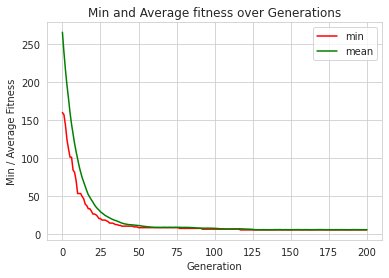

In [ ]:
# extract statistics:
minFitnessValues, meanFitnessValues = logbook.select("min", "avg")

# plot statistics:
sns.set_style("whitegrid")
plt.plot(minFitnessValues, color='red', label='min')
plt.plot(meanFitnessValues, color='green', label='mean')
plt.xlabel('Generation')
plt.ylabel('Min / Average Fitness')
plt.title('Min and Average fitness over Generations')
plt.legend()
plt.show()